# Аналіз показника Херста для стохастичних часових рядів

## 1. Теоретичне обґрунтування

### 1.1. Опис системи

У даному дослідженні розглядається параметр $s = \left(\frac{\tilde{\sigma}}{\sigma}\right)^n$,
який повністю характеризує стан всього навантаженого макророзмірного кристалу щодо розвитку макропластичної деформації
 та визначає стан (енергію і число ступенів свободи) активного дислокаційного сегмента,
відносно його ковзання на великі відстані, без виходу з початкової площини ковзання.

Диференціальне рівняння, що визначає еволюцію у часі параметра $s = \left(\frac{\tilde{\sigma}}{\sigma}\right)^n$
протягом макропластичної деформації як стохастичного перехідного процесу третього порядку:

$$\frac{d^3 s}{dt^3} - 3 \frac{d^2 s}{dt^2} \cdot \frac{ds}{dt} + \left(\frac{ds}{dt}\right)^3 = 0$$

Розв'язки цього рівняння мають форму:

$$s_1(t) = \ln \frac{A_1}{\left(2 - \left(\frac{t}{\hat{t}_1} - 1\right)^2\right)}$$

$$s_2(t) = \ln \frac{A_2}{\left(2 + \left(\frac{t}{\hat{t}_2} - 1\right)^2\right)}$$

де $A_j$ і $\hat{t}_j$ ($j = 1, 2$) - константи інтегрування.

У нашому дослідженні використовуються такі значення констант:
- $A_1 = 2.02$ та $\hat{t}_1 = 1300$ с
- Для $s_2(t)$ розглядаються три варіанти:
  - $A_2 = 10^{4.2}$ та $\hat{t}_2 = 30$ с
  - $A_2 = 10^5$ та $\hat{t}_2 = 30$ с
  - $A_2 = 10^7$ та $\hat{t}_2 = 30$ с

### 1.2. Показник Херста та R/S-аналіз

Показник Херста (H) є мірою довгострокової пам'яті часового ряду. Він характеризує персистентність (стійкість тренду), випадковість або антиперсистентність стохастичного процесу:

- H = 0.5 — відповідає броунівському руху (випадковому блуканню)
- 0.5 < H < 1.0 — персистентна поведінка (тренд підтримується)
- 0 < H < 0.5 — антиперсистентна поведінка (тренд змінюється)

R/S-аналіз (метод нормованого розмаху) є основним інструментом для оцінки показника Херста. Ця методика дозволяє визначити, чи є часовий ряд випадковим блуканням або має довгострокову залежність.

## 2. Методологія дослідження

### 2.1. Бібліотека для розрахунку показника Херста

Для розрахунку показника Херста ми використовуємо бібліотеку `hurst` у Python.
Ця бібліотека надає інструменти для аналізу випадкових блукань та обчислення показника Херста.

*Імпортуємо необхідні бібліотеки*:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

### 2.2. Генерація часових рядів для аналізу

Спочатку згенеруємо часові ряди $s_1(t)$ та $s_2(t)$ в інтервалі від -100 до 1500 секунд з кроком 10 секунд.

*Генеруємо часові точки*:

In [15]:
# Генерація часових точок
t = np.arange(-100, 1501, 10)  # від -100 до 1500 з кроком 10
len(t)

161

*Визначаємо функції для розрахунку $s_1(t)$ та $s_2(t)$*:

$$s_1(t) = \ln \frac{A_1}{\left(2 - \left(\frac{t}{\hat{t}_1} - 1\right)^2\right)}$$

In [16]:
def s1(time, A1=2.02, t_hat1=1300):
    return np.log(A1 / (2 - ((time / t_hat1) - 1)**2))

$$s_2(t) = \ln \frac{A_2}{\left(2 + \left(\frac{t}{\hat{t}_2} - 1\right)^2\right)}$$

In [17]:
def s2(time, A2, t_hat2=30):
    return np.log(A2 / (2 + ((time / t_hat2) - 1)**2))

*Визначаємо варіанти A2 для $s_2(t)$*:

In [18]:
A2_values = [10 ** 4.2, 10 ** 5, 10 ** 7]

*Розраховуємо часові ряди $s_1(t)$ та $s_2(t)$*:

- *для $s_1(t)$*:

In [19]:
s1_values = s1(t)

- *для всіх варіантів A2 для $s_2(t)$*:

In [20]:
s2_values = [s2(t, A2) for A2 in A2_values]

### 2.2. Візуалізація часових рядів

*Побудуємо графік для $s_1(t)$*:

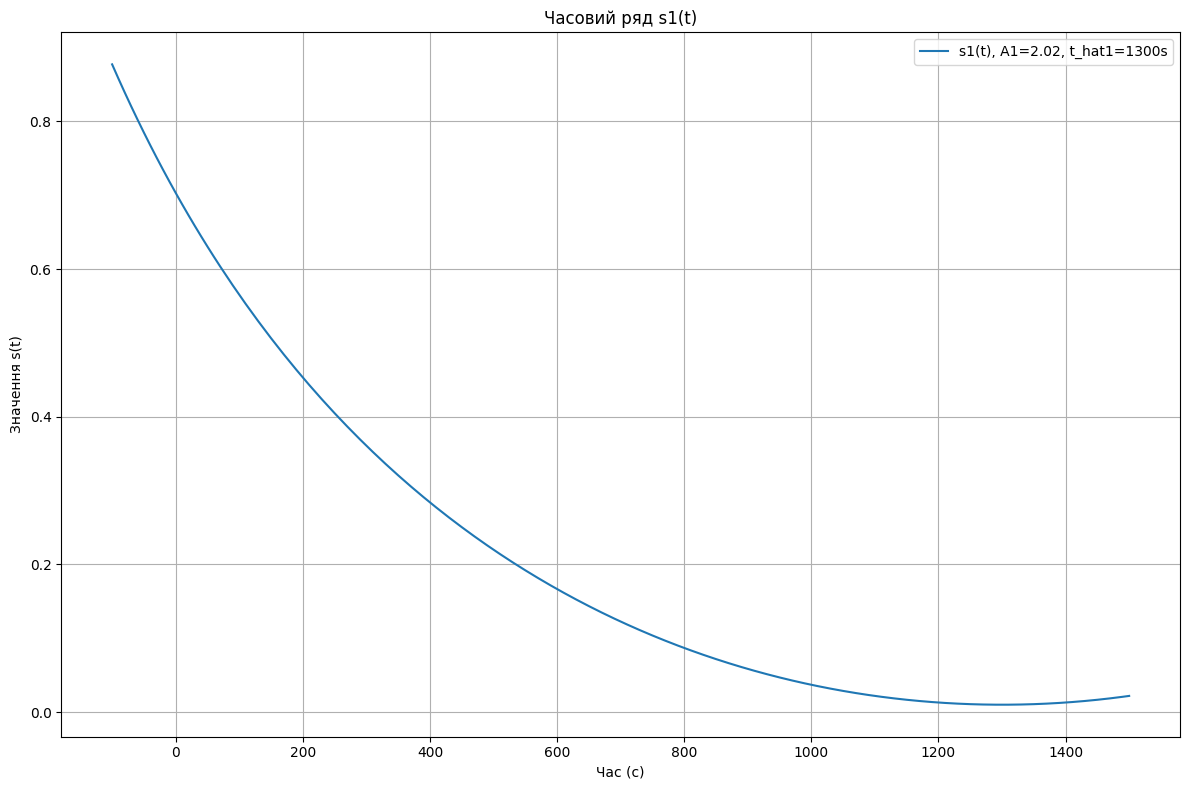

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(t, s1_values, label='s1(t), A1=2.02, t_hat1=1300s')
plt.title('Часовий ряд s1(t)')
plt.xlabel('Час (с)')
plt.ylabel('Значення s(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*Тепер побудуємо графіки для $s_2(t)$ з різними A2*:

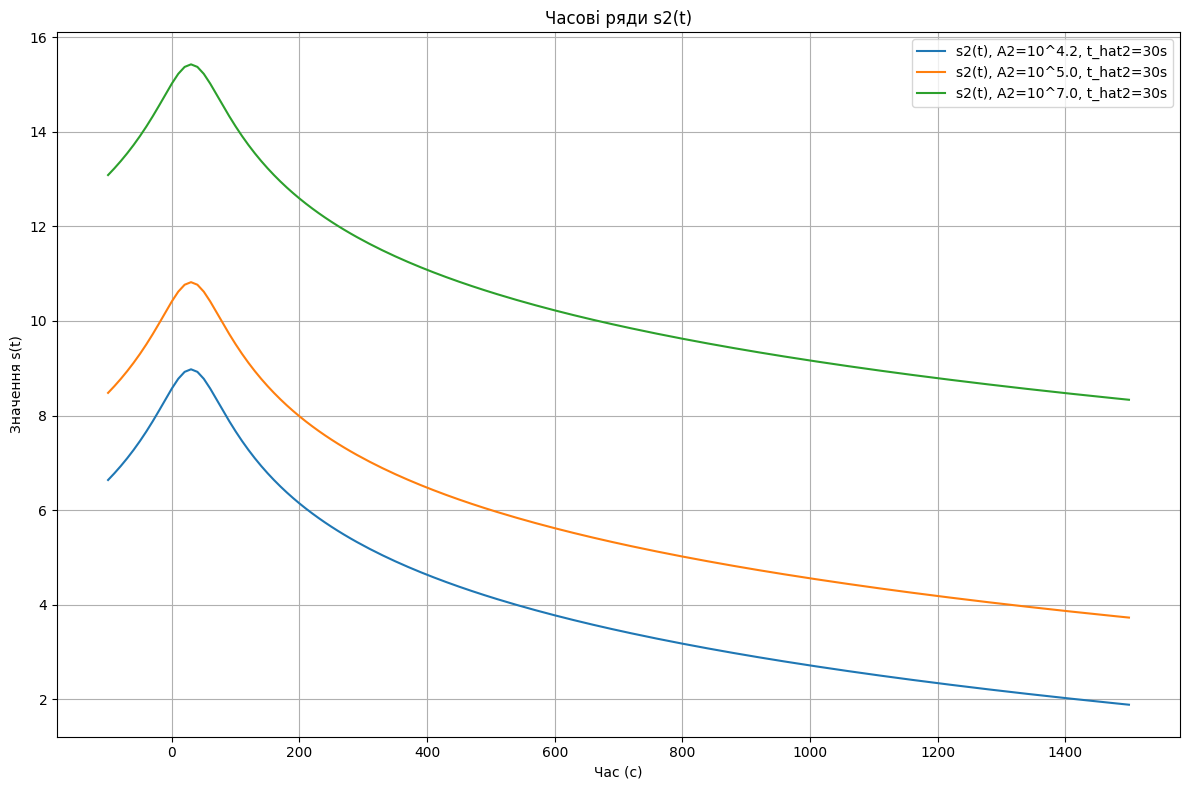

In [22]:
plt.figure(figsize=(12, 8))
for i, A2 in enumerate(A2_values):
    plt.plot(t, s2_values[i], label=f's2(t), A2=10^{np.log10(A2):.1f}, t_hat2=30s')
plt.title('Часові ряди s2(t)')
plt.xlabel('Час (с)')
plt.ylabel('Значення s(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.3 Розрахунок показників Херста

*Визначимо функцію для розрахунку показників Херста*:

In [23]:
def calculate_hurst(series):
    H, c, data = compute_Hc(series, kind='price', simplified=False)
    return H, c, data

Ця функція розраховує $H$ (Hurst exponent) та константу $c$ відповідно до рівняння Херста: $$E(R/S) = c \cdot T^H$$
де:

- $E(R/S)$ — очікуване (середнє) значення нормованого розмаху
- $c$ — константа пропорційності (часто близька до 0.5)
- $T$ — часовий інтервал (розмір вікна спостереження)
- $H$ — показник Херста (значення від 0 до 1)

$R/S$ — це статистична міра, яка розраховується за кілька кроків:

- Для часового ряду довжиною $T$ обчислюється середнє значення: $\mu = \frac{1}{T} \sum_{t=1}^{T} x(t)$
- Створюється ряд накопичених відхилень: $Y(t) = \sum_{i=1}^{t}[x(i) - \mu]$
- Визначається розмах: $R = \max(Y) - \min(Y)$ (різниця між максимальним і мінімальним значеннями $Y$)
- Обчислюється стандартне відхилення: $S = \sqrt{\frac{1}{T} \sum_{t=1}^{T}(x(t) - \mu)^2}$
- Нормований розмах: $R/S = \frac{R}{S}$

*Розрахуємо показник Херста для $s_1(t)$*:

In [24]:
H, c, data = calculate_hurst(s1_values)
print(f"s1(t): H={H:.4f}, c={c:.4f}")

s1(t): H=0.9647, c=0.4359


Таким чином для $s_1(t)$ показник Херста становить $H=0.9647$, константа масштабування $c=0,4359$.

*Побудуємо графічну залежність для $s_1(t)$ показника Херста*:

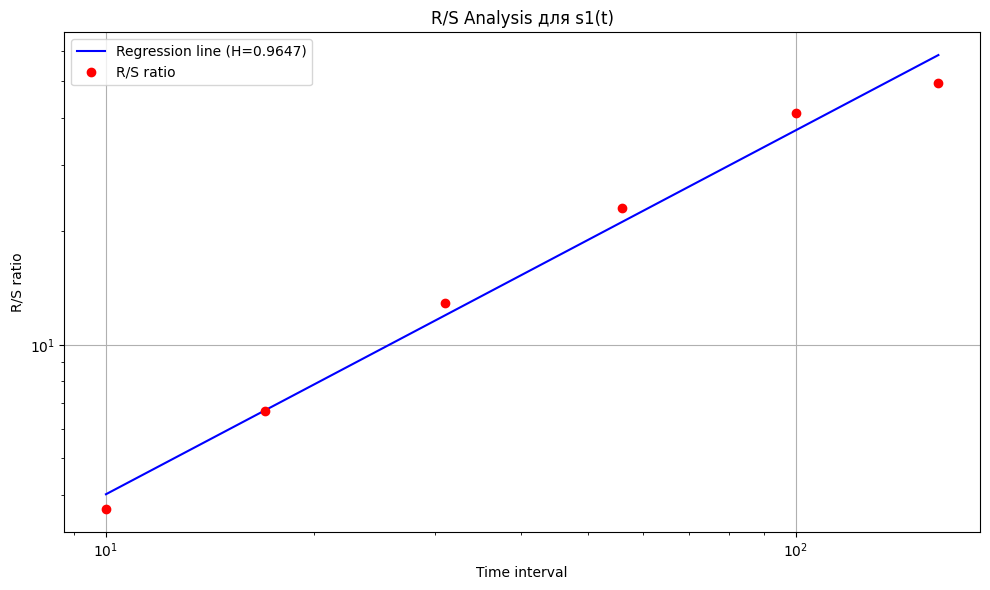

In [25]:
plt.figure(figsize=(10, 6))
plt.loglog(data[0], c*data[0]**H, 'b-', label=f'Regression line (H={H:.4f})')
plt.loglog(data[0], data[1], 'ro', label='R/S ratio')
plt.title('R/S Analysis для s1(t)')
plt.xlabel('Time interval')
plt.ylabel('R/S ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*Розрахуємо показник Херста для $s_2(t)$ з різними A2*:

* для $A_2 = 10^{4.2}$

In [26]:
H, c, data = calculate_hurst(s2_values[0])
print(f"s2(t) та A_2 = 10^(4.2) : H={H:.4f}, c={c:.4f}")

s2(t) та A_2 = 10^(4.2) : H=0.8671, c=0.5745


Таким чином для $s_2(t)$ з $A_2 = 10^{4.2}$ показник Херста становить $H=0.8671$, константа масштабування $c=0,5745$.